In [1]:
#load necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
#load dataset
df=pd.read_csv(r"C:\Users\Abel\Downloads\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<AxesSubplot:>

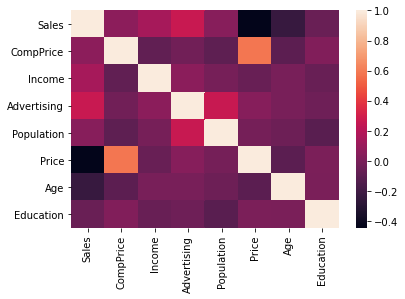

In [5]:
#correlation using heatmap
sns.heatmap(df.corr())

In [6]:
#statistical info of data
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


D:\Installation\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

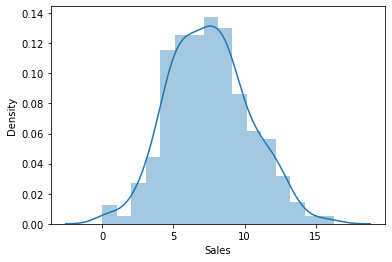

In [7]:
#distribution of sales
sns.distplot(df['Sales'])

In [8]:
#values of correlation
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [9]:
#detecting outliers using isolationforest
from sklearn.ensemble import IsolationForest
df1=pd.get_dummies(df)
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df1)
out=clf.predict(df1)
df1['anomaly']=out=clf.predict(df1)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [10]:
df1[df1.anomaly == -1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-1


In [11]:
#dropping those outliers
df2=df1.drop(index=[25,75,284,317],axis=0).reset_index()


In [12]:
#cross validation done by train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [13]:
df2.drop(['anomaly','index'],axis=1,inplace=True)

In [14]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


# Standardizing

In [15]:
#standardizing the dataset`
std=StandardScaler()
df_norm=std.fit_transform(df2)
rescaled=pd.DataFrame(df_norm,columns=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes'])
rescaled

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.719442,0.852228,0.150830,0.663797,0.084263,0.171826,-0.696320,1.186914,1.792419,-0.514952,-1.112335,-0.635811,0.635811,-0.735429,0.735429
1,1.331746,-0.922957,-0.746536,1.420892,-0.024650,-1.393841,0.729508,-1.485812,-0.557905,1.941928,-1.112335,-0.635811,0.635811,-0.735429,0.735429
2,0.918797,-0.791462,-1.213167,0.512378,0.036614,-1.520787,0.357553,-0.722176,-0.557905,-0.514952,0.899010,-0.635811,0.635811,-0.735429,0.735429
3,-0.028138,-0.528471,1.119985,-0.396137,1.377604,-0.801427,0.109583,0.041460,-0.557905,-0.514952,0.899010,-0.635811,0.635811,-0.735429,0.735429
4,-1.185106,1.049471,-0.172222,-0.547556,0.519915,0.510348,-0.944290,-0.340358,1.792419,-0.514952,-1.112335,-0.635811,0.635811,1.359750,-1.359750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.812333,0.852228,1.407143,1.572311,-0.412652,0.510348,-1.254252,0.041460,-0.557905,1.941928,-1.112335,-0.635811,0.635811,-0.735429,0.735429
392,-0.476685,0.917976,-1.643902,-0.547556,-1.542623,0.171826,0.109583,-1.103994,-0.557905,-0.514952,0.899010,1.572795,-1.572795,-0.735429,0.735429
393,-0.024578,2.430171,-1.536218,0.815216,0.710512,1.822124,-0.820305,1.568732,-0.557905,-0.514952,0.899010,-0.635811,0.635811,-0.735429,0.735429
394,-0.547884,-1.646180,0.366198,0.058120,0.138720,-0.886057,-0.200380,-0.722176,1.792419,-0.514952,-1.112335,-0.635811,0.635811,-0.735429,0.735429


# Feature selection

In [16]:
#seperating input and output
y=rescaled.iloc[:,0]
x=rescaled.iloc[:,1:]


In [17]:
#feature selection using univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction
test = SelectKBest(score_func=f_regression, k='all')
fit = test.fit(x, y)
print(fit.scores_)


[1.52711170e+00 1.03821792e+01 3.31460663e+01 1.22766456e+00
 9.49253330e+01 2.25686404e+01 8.02993536e-01 7.41390214e+01
 1.30927139e+02 1.84618857e+00 1.45380305e-02 1.45380305e-02
 1.41916665e+01 1.41916665e+01]


# Now we will take top features to build the model

In [18]:
input1=rescaled['ShelveLoc_Good']
input2=rescaled['ShelveLoc_Bad']
input3=rescaled['ShelveLoc_Medium']
input4=rescaled['Price']
input5=rescaled['Advertising']
input6=rescaled['Age']
X=pd.concat([input1,input2,input3,input4,input5,input6],axis=1)
Y=rescaled.iloc[:,0]

In [19]:
#splitting dataset into train test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [20]:
#building the model
rf=RandomForestRegressor()
model=rf.fit(x_train,y_train)

In [21]:
#predicting the model
y_pred=model.predict(x_test)


In [22]:
#accuracy`
rmse=np.sqrt(np.mean(y_test - y_pred)**2)
rmse

0.0544962414195939